Back to the main [Index](index.ipynb) <a id="top"></a>

# Analyzing wannier90 results with AbiPy

This notebook shows how to use AbiPy to analyze the output files
produced by [wannier90](http://www.wannier.org/) and how to use the `ABIWAN.nc`
produce by Abinit to interpolate the band energies.

As usual, one can use `abiopen.py FILE` with --expose or --print for a command line interface
and --notebook to generate a jupyter notebook.

Note: The code in this notebook requires abinit >= 8.9 and abipy >= 0.6


## Table of Contents
[[back to top](#top)]

- [How to analyze the WOUT file](#How-to-analyze-the-WOUT-file)
- [Using ABIWAN.nc to interpolate band energies](#Using-ABIWAN.nc-to-interpolate-band-energies)

Let's start by importing the basic modules we'll need for this tutorial.

In [1]:
# Use this at the beginning of your script so that your code will be compatible with python3
from __future__ import print_function, division, unicode_literals

import warnings 
warnings.filterwarnings("ignore")  # Ignore warnings

from abipy import abilab
abilab.enable_notebook() # This line tells AbiPy we are running inside a notebook
import abipy.data as abidata

import seaborn as sns
sns.set(context='notebook', style='darkgrid', palette='deep',
        font='sans-serif', font_scale=1, color_codes=False, rc=None)

# This line tells the notebook to show plots inside of the notebook
%matplotlib notebook

## How to analyze the WOUT file  
[[back to top](#top)]

Use `abiopen` to open a wout file (the main output file produced by wannier90):

In [2]:
import os
filepath = os.path.join(abidata.dirpath, "refs", "wannier90", "example01_gaas.wout")

wout = abilab.abiopen(filepath)
print(wout)

================================= File Info =================================
Name: example01_gaas.wout
Directory: /Users/gmatteo/git_repos/abipy/abipy/data/refs/wannier90
Size: 31.64 kb
Access Time: Sun Aug  5 20:07:27 2018
Modification Time: Thu Jun 14 22:40:52 2018
Change Time: Thu Jun 14 22:40:52 2018

================================= Structure =================================
Full Formula (Ga1 As1)
Reduced Formula: GaAs
abc   :   4.016499   4.016499   4.016499
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Ga    0     0     0
  1  As    0.25  0.25  0.25

Wannier90 version: 2.1.0+git
Number of Wannier functions: 4
K-grid: [2 2 2]

================================= WANNIERISE =================================
iter  delta_spread  rms_gradient    spread  time      O_D      O_OD     O_TOT
   0  4.470000e+00  0.000000e+00  4.468812  0.00  0.00832  0.503629  4.468812
   1 -1.930000e-03  6.679013e-02  4.466881  0.00  0.008

One can plot the convergence of the wannier cycle with:

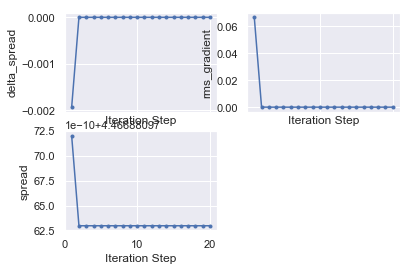

In [3]:
wout.plot();

and the evolution of the Wannier centers and spread with:

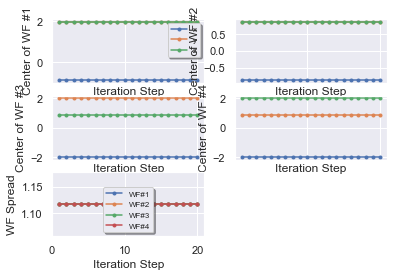

In [4]:
wout.plot_centers_spread();

<div class="alert alert-info" role="alert">
Alternatively one can use `abiopen.py FILE_MDF.nc -nb` to generate a jupyter notebook directly from the terminal
or `abiopen.py FILE_MDF.nc -e -sns` to produce matplotlib plots automatically.
</div>

## Using ABIWAN.nc to interpolate band energies
[[back to top](#top)]


`ABIWAN.nc` is a netcdf file produced by Abinit after having called *wannier90* in library mode.
The file contains the unitary transformation and other important parameters of the calculations.
This file can be read by AbiPy and can be used to interpolate band energies with the wannier method.

As usual, use `abiopen` to open the file:

In [5]:
filepath = os.path.join(abidata.dirpath, "refs", "wannier90", "tutoplugs_tw90_4", "tw90_4o_DS3_ABIWAN.nc")
abiwan = abilab.abiopen(filepath)
print(abiwan)

================================= File Info =================================
Name: tw90_4o_DS3_ABIWAN.nc
Directory: /Users/gmatteo/git_repos/abipy/abipy/data/refs/wannier90/tutoplugs_tw90_4
Size: 205.47 kb
Access Time: Sun Aug  5 20:07:39 2018
Modification Time: Fri Jul 20 00:04:24 2018
Change Time: Fri Jul 20 00:04:24 2018

================================= Structure =================================
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.840259   3.840259   3.840259
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25

Abinit Spacegroup: spgid: 227, num_spatial_symmetries: 24, has_timerev: False, symmorphic: False

============================== Electronic Bands ==============================
Number of electrons: 8.0, Fermi level: 5.861 (eV)
nsppol: 1, nkpt: 64, mband: 14, nspinor: 1, nspden: 1
smearing scheme: none, tsmear_eV: 0.272, occopt: 1
Direct gap:
    Energ

To plot the matrix elements of the KS Hamiltonian in real space in the Wannier Gauge, use:

HWanR built in 0.063 (s)


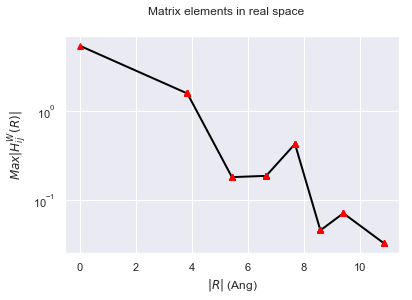

In [6]:
abiwan.hwan.plot(title="Matrix elements in real space");

To interpolate the KS energies along a high-symmetry k-path and construct a new `ElectronBands` object, use:

In [7]:
ebands_kpath = abiwan.interpolate_ebands()

Interpolation completed in 0.109 [s]


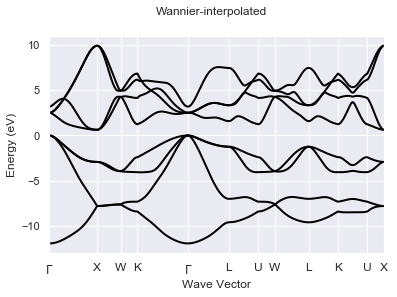

In [8]:
ebands_kpath.plot(title="Wannier-interpolated");

If you need a IBZ sampling, instead of a k-path, use:

In [9]:
ebands_kmesh = abiwan.interpolate_ebands(ngkpt=(36, 36, 36))

Interpolation completed in 0.221 [s]


As we are dealing with AbiPy objects, we can reuse easily the AbiPy API to plot bands + DOS:

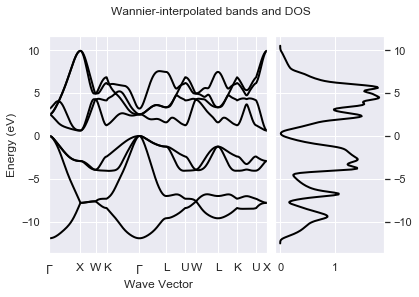

In [10]:
ebands_kpath.plot_with_edos(ebands_kmesh.get_edos(), title="Wannier-interpolated bands and DOS");

In [11]:
plotter = abiwan.get_plotter_from_ebands(ebands_kpath)

Interpolation completed in 0.096 [s]


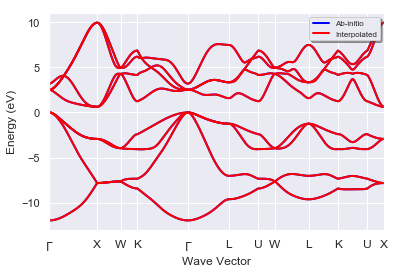

In [12]:
plotter.combiplot();

<div class="alert alert-info" role="alert">
Robots can also be constructed from the command line with: `abicomp.py mdf FILES`.
Use the `--expose` option to generate plots automatically.
</div>

Back to the main [Index](index.ipynb)